## Credit Card Fraud Detection Project

In [2]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report

In [3]:
# Load the csv file

dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Perform Exploratory Data Analysis

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for null values
dataframe.isnull().values.any()

False

In [7]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


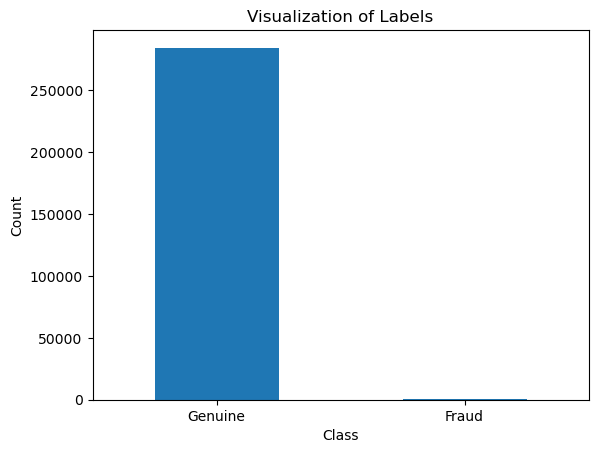

In [9]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [10]:
# Perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


Let's train different models on our dataset and observe which algorithm works better for our problem.

Let's apply Random Forests and Decision Trees algorithms to our dataset.

In [14]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) 
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  0.999204147794436


In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 20)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) 
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  0.9996254813150287


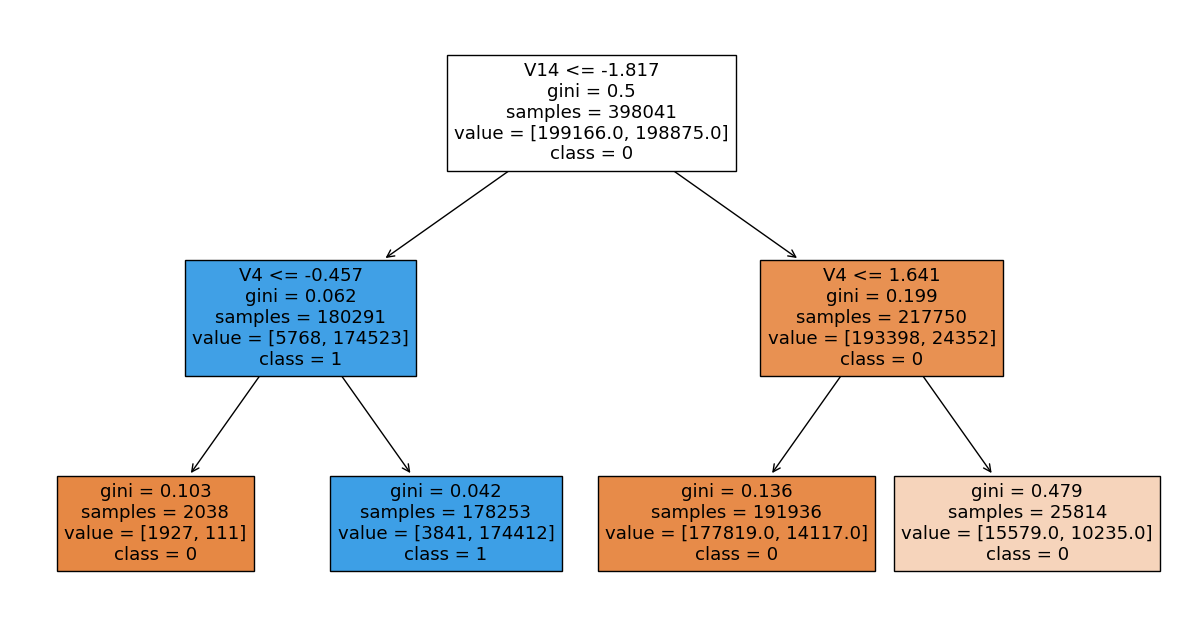

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Train decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  
clf.fit(train_X, train_Y)

# Plot decision tree
plt.figure(figsize=(15,8))
plot_tree(clf,feature_names=X.columns, class_names=[str(c) for c in clf.classes_],filled=True)
plt.show()

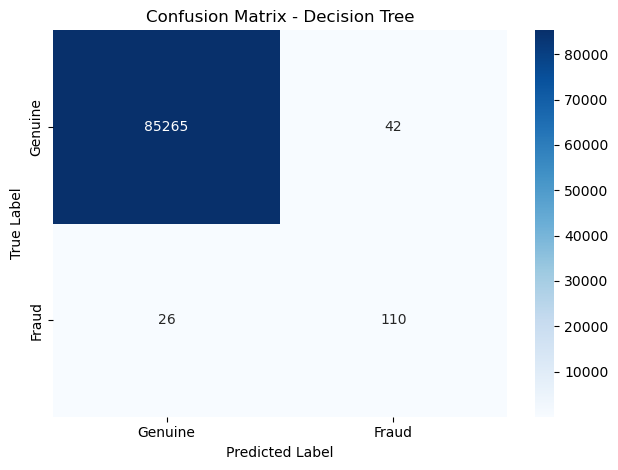

In [17]:
# Compute confusion matrix
cm = confusion_matrix(test_Y, predictions_dt.round())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

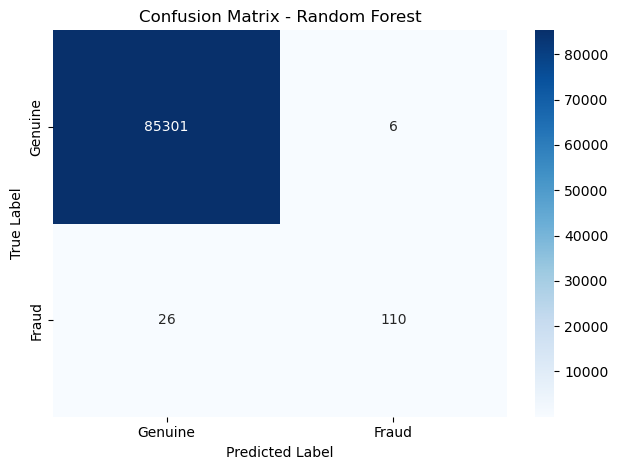

In [18]:
# Compute confusion matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [19]:
#mod1
print("Decision Tree Model")
print(classification_report(test_Y, predictions_dt.round()))

Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.72      0.81      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
print("Random Forest Model")
print(classification_report(test_Y, predictions_rf))

Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



Clearly, Random Forest model works better than Decision Trees

In [24]:
# Performing oversampling on RF and DT using SMOTE
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)


In [55]:
# Build the Random Forest classifier on the new dataset
rf_resampled = RandomForestClassifier(n_estimators = 20)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y)
random_forest_score_resampled

0.9998593109755025

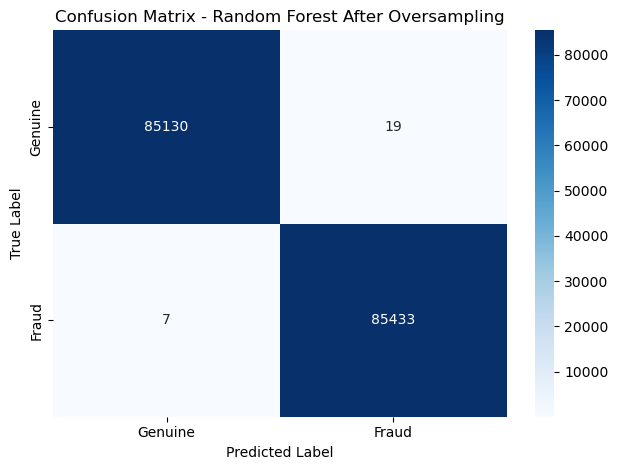

In [26]:
# Visualize the confusion matrix
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
sns.heatmap(cm_resampled, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix - Random Forest After Oversampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [27]:
print("Random Forest Model After Oversampling")
print(classification_report(test_Y, predictions_resampled, digits=4))

Random Forest Model After Oversampling
              precision    recall  f1-score   support

           0     0.9999    0.9998    0.9998     85149
           1     0.9998    0.9999    0.9998     85440

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

